In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

In [3]:
voice = pd.read_parquet('spectrograms.parquet')
voice.head()

,participant_id,session_id,task_name,spectrogram
0,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Animal-fluency,"[[-0.02225934, -3.1518757, -15.17877, -17.2232..."
1,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Audio-Check-1,"[[-23.684378, -26.501308, -39.272846, -41.9677..."
2,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Audio-Check-1,"[[-6.8226786, -9.482935, -16.019827, -9.468054..."
3,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Audio-Check-1,"[[-1.7471554, -10.702844, -23.676697, 3.137520..."
4,01401050-e9dd-486e-b0d4-0001ee7f861d,345A00C1-1BCC-42D8-85DC-5AC069824883,Audio-Check-1,"[[3.3849745, -16.88583, 1.2469281, -24.251068,..."


In [4]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12523 entries, 0 to 12522
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  12523 non-null  object
 1   session_id      12523 non-null  object
 2   task_name       12523 non-null  object
 3   spectrogram     12523 non-null  object
dtypes: object(4)
memory usage: 391.5+ KB


<Axes: >

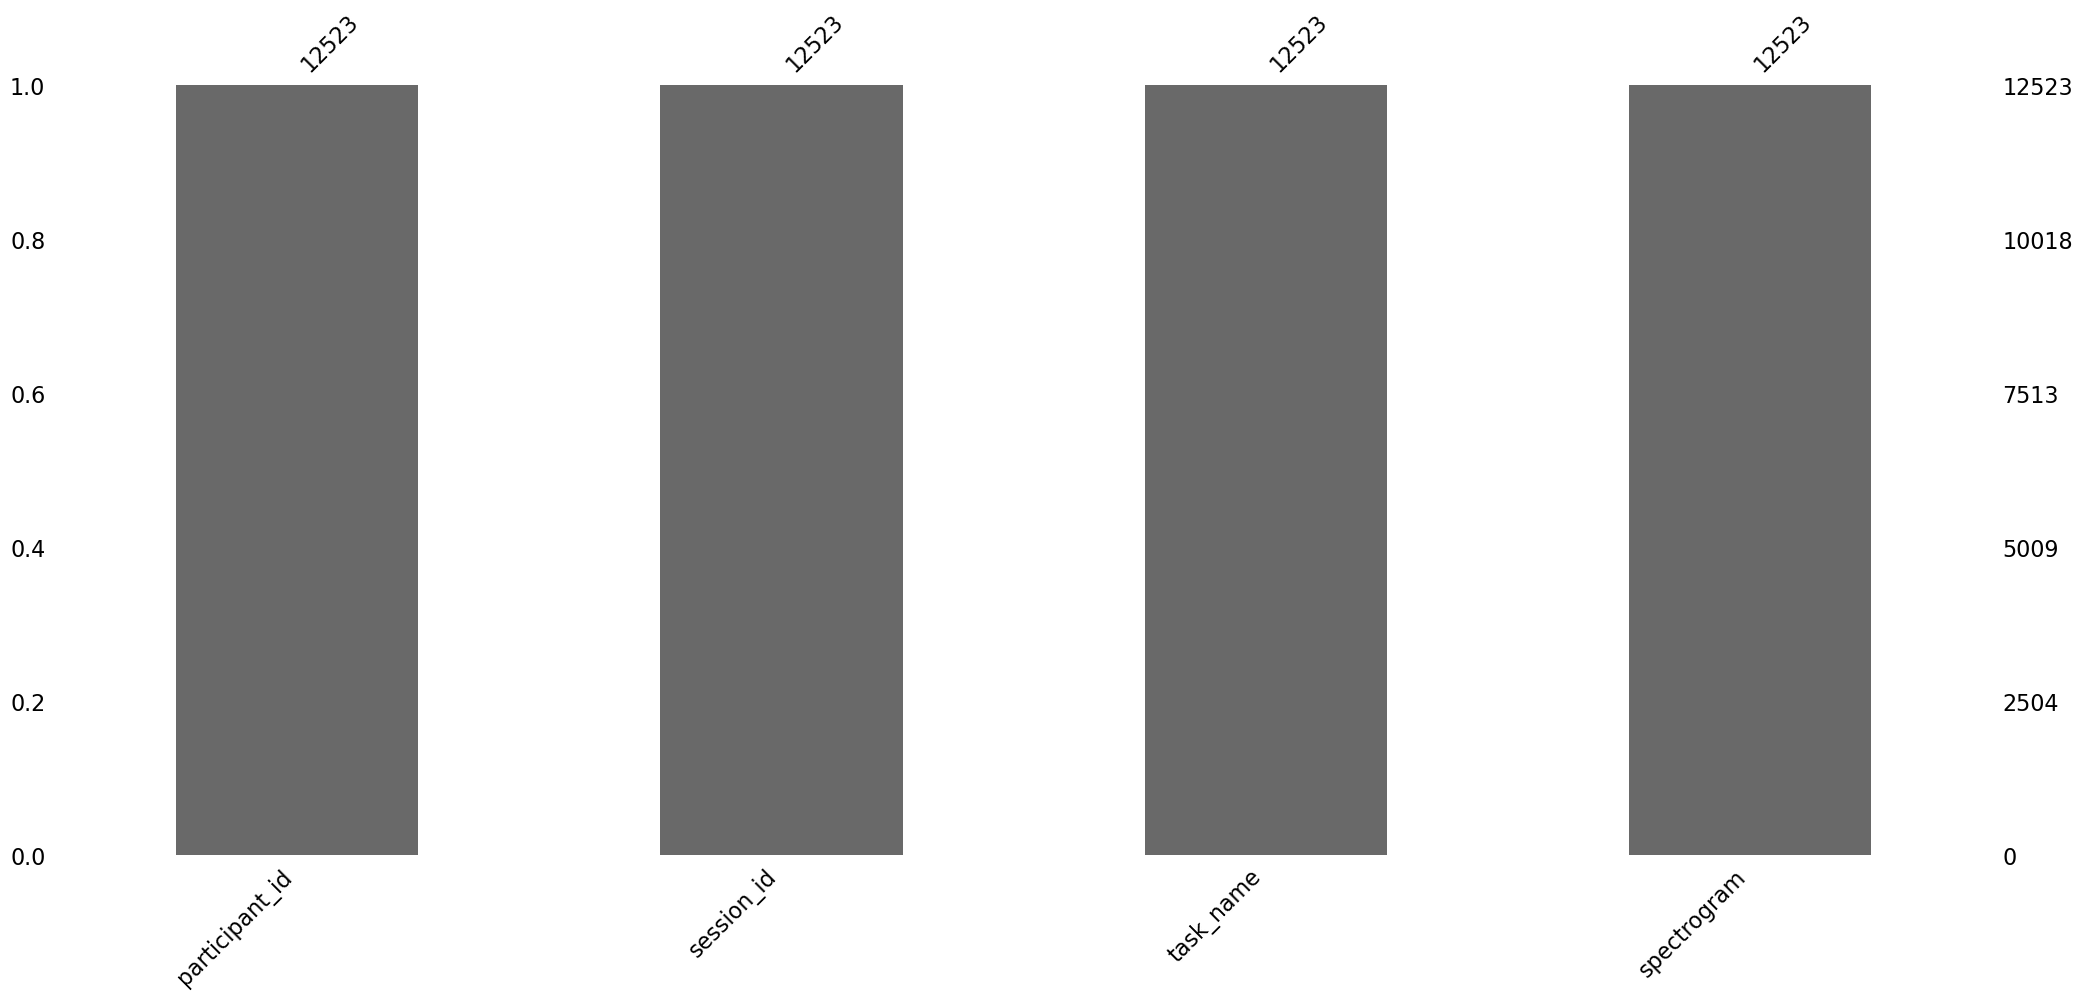

In [5]:
import missingno as msno
msno.bar(voice)

#### mfcc.parquet data = data derived from the spectrograms 

In [7]:
data = pd.read_parquet('mfcc.parquet')
data.head()

,participant_id,session_id,task_name,mfcc
0,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Animal-fluency,"[[-348.4421, -367.00308, -343.16043, -326.7899..."
1,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Audio-Check-1,"[[-381.90134, -367.65247, -378.91107, -371.117..."
2,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Audio-Check-1,"[[-341.4793, -345.0107, -348.3224, -355.94992,..."
3,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Audio-Check-1,"[[-341.27325, -351.8199, -358.4581, -352.53214..."
4,01401050-e9dd-486e-b0d4-0001ee7f861d,345A00C1-1BCC-42D8-85DC-5AC069824883,Audio-Check-1,"[[-340.5724, -357.30258, -351.12714, -358.1320..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12523 entries, 0 to 12522
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  12523 non-null  object
 1   session_id      12523 non-null  object
 2   task_name       12523 non-null  object
 3   mfcc            12523 non-null  object
dtypes: object(4)
memory usage: 391.5+ KB


<Axes: >

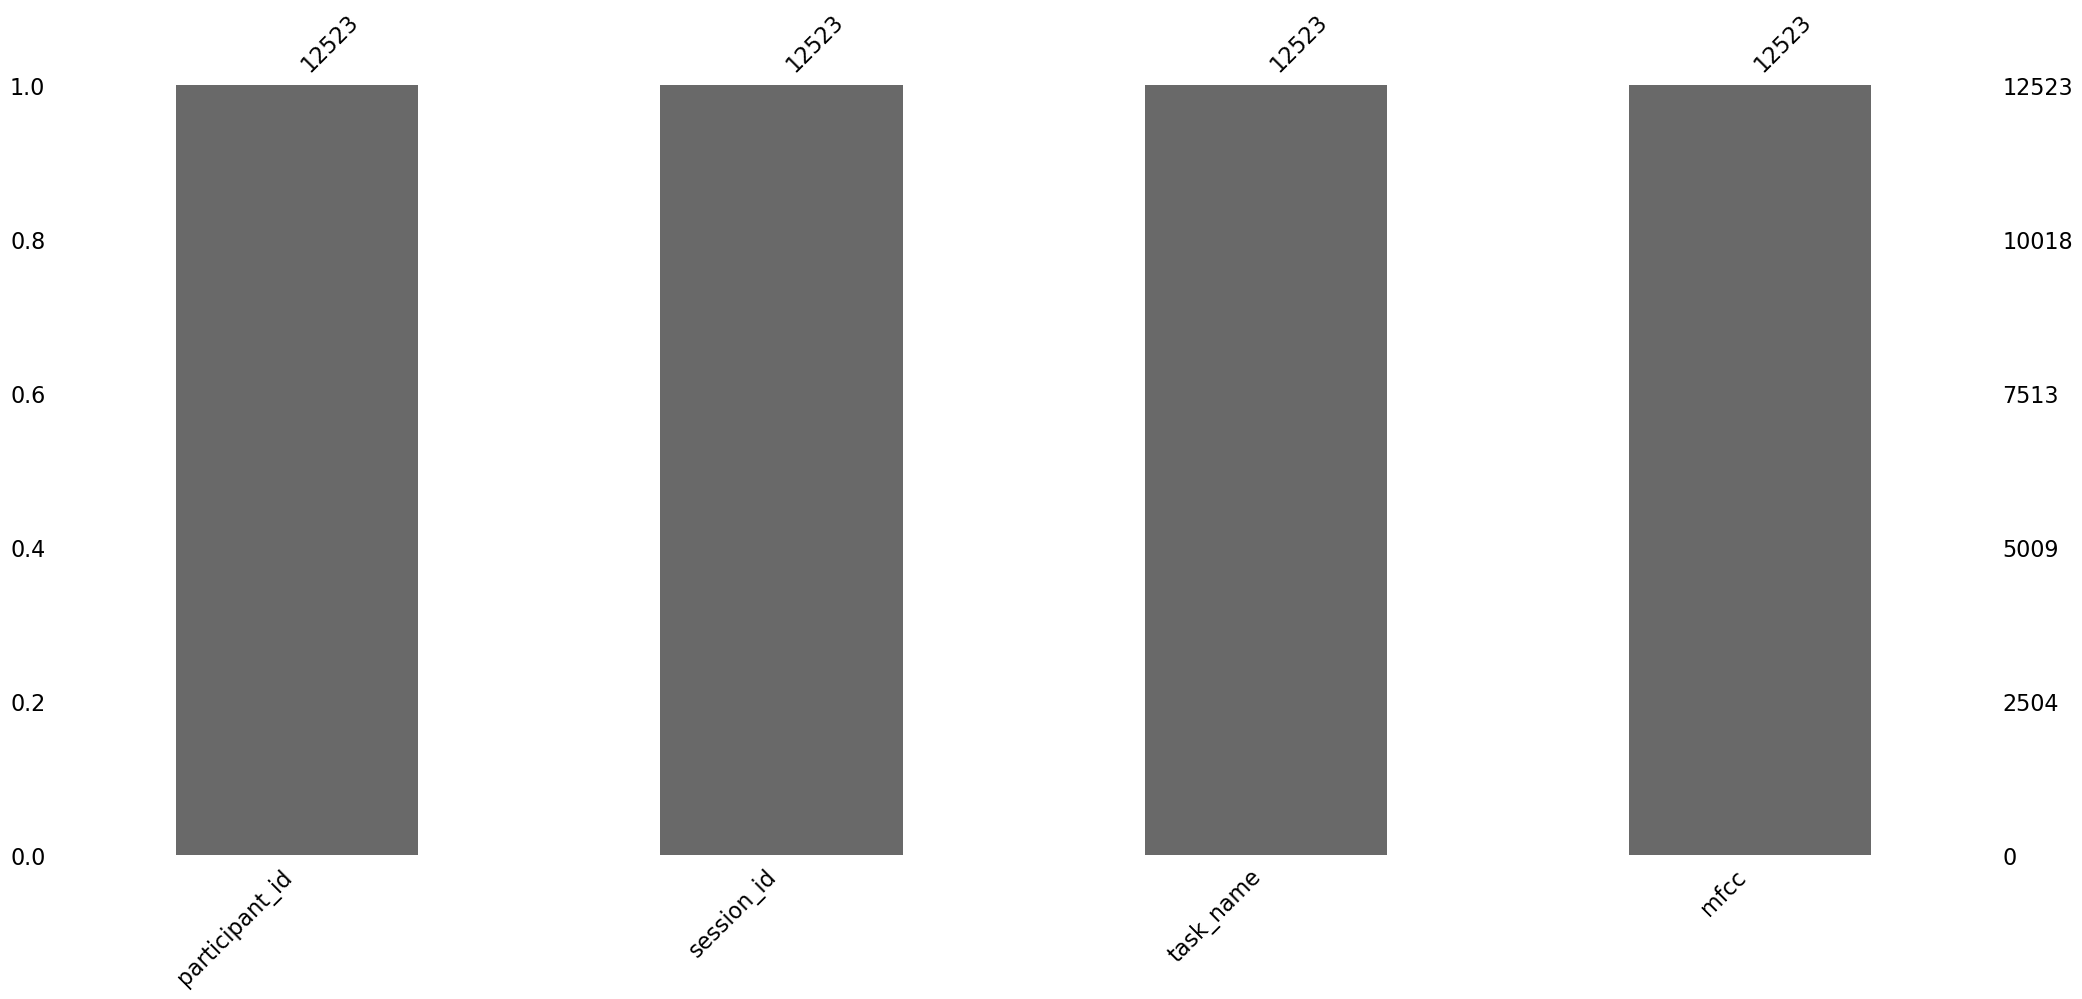

In [9]:
msno.bar(data)

#### Phenotype file that includes information collected during patient visit 

In [10]:
voice_demo = pd.read_csv('phenotype.tsv', sep='\t', header = 0)
voice_demo.head()

,participant_id,demographics_session_id,demographics_duration,demographics_completed_by___1,demographics_completed_by___2,demographics_completed_by___3,country,gender_identity,specify_gender_identity,sexual_orientation,...,winograd_q_267,winograd_q_268,winograd_q_269,winograd_q_270,winograd_q_271,winograd_q_272,winograd_q_273,winograd_q_274,winograd_q_275,winograd_q_276
0,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,Male gender identity,Cis: same gender as the sex assigned at birth,Heterosexual,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN
1,022c62b4-1b02-43f1-90cf-301b61eb406c,653DCE31-88E0-4937-A1E9-178C2E08D204,182.0,Checked,Unchecked,Unchecked,USA,Female gender identity,Cis: same gender as the sex assigned at birth,Heterosexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03252baf-d198-4588-b39f-b9574dc8b7d5,4EA6AAA2-413A-413D-A79F-591A2BFFDE64,185.0,Checked,Unchecked,Unchecked,USA,Male gender identity,Cis: same gender as the sex assigned at birth,Heterosexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04f6473c-99f1-4b65-bfe3-fcd9fa06dfc9,710F2097-E5C8-4595-830D-AE9C964C5D0E,539.0,Checked,Unchecked,Unchecked,USA,Male gender identity,Cis: same gender as the sex assigned at birth,Heterosexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0581355f-1d0f-4499-a79c-1182e38d3846,21C1F1CA-1FFA-497F-96C0-0075CF1B444C,479.0,Checked,Unchecked,Unchecked,USA,Male gender identity,Cis: same gender as the sex assigned at birth,Heterosexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
voice_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 1037 entries, participant_id to winograd_q_276
dtypes: float64(199), object(838)
memory usage: 2.4+ MB


In [12]:
voice_demo.columns

Index(['participant_id', 'demographics_session_id', 'demographics_duration',
       'demographics_completed_by___1', 'demographics_completed_by___2',
       'demographics_completed_by___3', 'country', 'gender_identity',
       'specify_gender_identity', 'sexual_orientation',
       ...
       'winograd_q_267', 'winograd_q_268', 'winograd_q_269', 'winograd_q_270',
       'winograd_q_271', 'winograd_q_272', 'winograd_q_273', 'winograd_q_274',
       'winograd_q_275', 'winograd_q_276'],
      dtype='object', length=1037)

In [13]:
voice_demo.isnull().sum().sum()

179863

#### Features derived from raw audio , one feature per audio 

In [14]:
static = pd.read_csv('static_features.tsv', sep ='\t')
static.head()

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,ddp_jitter,local_shimmer,localDB_shimmer,apq3_shimmer,apq5_shimmer,apq11_shimmer,dda_shimmer,stoi,pesq,si_sdr
0,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Animal-fluency,"Crocodile, elephant, tiger, lion, fish, spider...",24.864290,0.132175,23.339592,24.613604,26.549681,3.210089,...,0.040843,0.096419,0.903041,0.041536,0.052174,0.078436,0.124607,0.975225,2.364464,10.133621
1,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Audio-Check-1,NaN,25.983776,0.121441,22.824551,25.727135,29.178686,6.354136,...,0.028127,0.127108,1.246614,0.048221,0.062979,0.147423,0.144663,0.999534,4.028465,22.257130
2,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Audio-Check-1,NaN,27.476891,0.076218,26.455244,27.656855,28.873682,2.418438,...,0.032737,0.112579,0.977530,0.046921,0.058115,0.081449,0.140762,0.998336,3.835773,15.165257
3,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Audio-Check-1,NaN,26.184229,0.079354,24.606220,26.742279,27.747513,3.141293,...,0.033730,0.099633,1.059468,0.029359,0.049161,0.096536,0.088077,0.958362,3.754798,24.248236
4,01401050-e9dd-486e-b0d4-0001ee7f861d,345A00C1-1BCC-42D8-85DC-5AC069824883,Audio-Check-1,NaN,25.616760,0.081129,24.391144,26.272486,27.255566,2.864422,...,0.025338,0.092465,0.889760,0.035356,0.039349,0.144114,0.106068,0.983925,3.775798,17.947460


In [15]:
static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12523 entries, 0 to 12522
Columns: 135 entries, participant_id to si_sdr
dtypes: float64(131), object(4)
memory usage: 12.9+ MB


#### Merged Dataset of Spectrograms and Phenotype (demographics count) 

In [16]:
merged_df = pd.merge(voice, voice_demo, on='participant_id', how = 'inner')
merged_df.head()

,participant_id,session_id,task_name,spectrogram,demographics_session_id,demographics_duration,demographics_completed_by___1,demographics_completed_by___2,demographics_completed_by___3,country,...,winograd_q_267,winograd_q_268,winograd_q_269,winograd_q_270,winograd_q_271,winograd_q_272,winograd_q_273,winograd_q_274,winograd_q_275,winograd_q_276
0,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Animal-fluency,"[[-0.02225934, -3.1518757, -15.17877, -17.2232...",09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN
1,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Audio-Check-1,"[[-23.684378, -26.501308, -39.272846, -41.9677...",09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN
2,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Audio-Check-1,"[[-6.8226786, -9.482935, -16.019827, -9.468054...",09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN
3,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Audio-Check-1,"[[-1.7471554, -10.702844, -23.676697, 3.137520...",09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN
4,01401050-e9dd-486e-b0d4-0001ee7f861d,345A00C1-1BCC-42D8-85DC-5AC069824883,Audio-Check-1,"[[3.3849745, -16.88583, 1.2469281, -24.251068,...",09E64686-7FEC-4A52-A62B-B0F1CF266B2C,1202.0,Checked,Unchecked,Unchecked,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,Janie,NaN,NaN,NaN


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12523 entries, 0 to 12522
Columns: 1040 entries, participant_id to winograd_q_276
dtypes: float64(199), object(841)
memory usage: 99.4+ MB


In [18]:
merged_df.describe()

,demographics_duration,household_count,confounders_duration,age_start_smoking,age_stop_smoking,drinks_today_number,caffeine_intake,caffeine_intake_today,hydration,hydration_today,...,winograd_q_215,winograd_q_225,winograd_q_229,winograd_q_233,winograd_q_242,winograd_q_246,winograd_q_247,winograd_q_260,winograd_q_261,winograd_q_264
count,12494.000000,12494.000000,12494.000000,3819.000000,3303.000000,127.0,12494.000000,12494.000000,12494.000000,12494.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,303.111814,2.711782,609.313911,18.593611,41.985771,0.0,0.746198,1.417240,2.173763,6.103089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,367.027344,7.110865,352.983594,5.830262,15.300566,0.0,0.941335,1.408711,1.792568,4.298973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,70.000000,0.000000,103.000000,11.000000,18.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,187.000000,1.000000,413.000000,16.000000,29.000000,0.0,0.000000,0.000000,1.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,236.000000,2.000000,529.000000,17.000000,40.000000,0.0,1.000000,1.000000,2.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,332.000000,3.000000,702.000000,20.000000,55.000000,0.0,1.000000,2.000000,3.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5328.000000,112.000000,3977.000000,50.000000,76.000000,0.0,8.000000,12.000000,10.000000,48.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_df.columns.values.tolist()

['participant_id',
 'session_id',
 'task_name',
 'spectrogram',
 'demographics_session_id',
 'demographics_duration',
 'demographics_completed_by___1',
 'demographics_completed_by___2',
 'demographics_completed_by___3',
 'country',
 'gender_identity',
 'specify_gender_identity',
 'sexual_orientation',
 'race___1',
 'race___2',
 'race___3',
 'race___4',
 'race___5',
 'race___6',
 'race___7',
 'race___8',
 'ethnicity',
 'hearing',
 'vision',
 'cognition',
 'mobility',
 'self_care',
 'independent_living',
 'employ_status___1',
 'employ_status___2',
 'employ_status___3',
 'employ_status___4',
 'employ_status___5',
 'employ_status___6',
 'employ_status___7',
 'employ_status___8',
 'employ_status___9',
 'household_income_usa',
 'household_income_ca',
 'marital_status___1',
 'marital_status___2',
 'marital_status___3',
 'marital_status___4',
 'marital_status___5',
 'marital_status___6',
 'marital_status___7',
 'housing_status',
 'household_count',
 'spouse_partner_sig_other',
 'children',
 'p

#### Demographic counts of ailments

##### Neuroligical counts 

In [20]:
neuro_counts = merged_df[['neurological_history___1', 'neurological_history___2', 'neurological_history___3', 
                         'neurological_history___4', 'neurological_history___5', 'neurological_history___6'
                         ]].agg([ 'value_counts']).T

print(neuro_counts)

                                       Unchecked  Checked
neurological_history___1 value_counts      12259      235
neurological_history___2 value_counts      12363      131
neurological_history___3 value_counts      12103      391
neurological_history___4 value_counts      12453       41
neurological_history___5 value_counts      11876      618
neurological_history___6 value_counts      11748      746


#### Respiratory counts 

In [21]:
resp_conditions_counts = merged_df[['respiratory_conditions___1', 'respiratory_conditions___2', 'respiratory_conditions___3',
                                   'respiratory_conditions___4', 'respiratory_conditions___5', 'respiratory_conditions___6', 
                                   'respiratory_conditions___7', 'respiratory_conditions___8']].agg(['value_counts']).T

print(resp_conditions_counts)

                                         Unchecked  Checked
respiratory_conditions___1 value_counts    12119.0    375.0
respiratory_conditions___2 value_counts    12375.0    119.0
respiratory_conditions___3 value_counts    12302.0    192.0
respiratory_conditions___4 value_counts    12411.0     83.0
respiratory_conditions___5 value_counts    12269.0    225.0
respiratory_conditions___6 value_counts    12418.0     76.0
respiratory_conditions___7 value_counts    12494.0      NaN
respiratory_conditions___8 value_counts    12426.0     68.0


In [22]:
covid_counts = merged_df[['covid___past_year', 'covid___long', 'covid_past']].agg(['value_counts']).T

print(covid_counts)

                                Unchecked  Checked      No    Yes
covid___past_year value_counts     9892.0   2602.0     NaN    NaN
covid___long      value_counts    12163.0    331.0     NaN    NaN
covid_past        value_counts        NaN      NaN  2557.0  128.0


In [23]:
resp_history_counts = merged_df[['resp_medical_history___1', 'resp_medical_history___2', 'resp_medical_history___3', 
                               'resp_medical_history___4']].agg(['value_counts']).T

print(resp_history_counts)

                                       Unchecked  Checked
resp_medical_history___1 value_counts      12303      191
resp_medical_history___2 value_counts      12372      122
resp_medical_history___3 value_counts      11458     1036
resp_medical_history___4 value_counts      11857      637


#### Circulatory counts 

In [24]:
circulatory_counts =merged_df[['circulatory_conditions___1', 'circulatory_conditions___2', 'circulatory_conditions___3', 
                              'circulatory_conditions___4', 'circulatory_conditions___5', 'circulatory_conditions___6'
                              ]].agg(['value_counts']).T

print(circulatory_counts)

                                         Unchecked  Checked
circulatory_conditions___1 value_counts    11938.0    556.0
circulatory_conditions___2 value_counts    11714.0    780.0
circulatory_conditions___3 value_counts    12494.0      NaN
circulatory_conditions___4 value_counts    12093.0    401.0
circulatory_conditions___5 value_counts    12231.0    263.0
circulatory_conditions___6 value_counts     9731.0   2763.0


In [25]:
circulatory_history_counts = merged_df[[ 'circulatory_med_history___1','circulatory_med_history___2',
                                        'circulatory_med_history___3','circulatory_med_history___4','circulatory_med_history___5']].agg(['value_counts']).T

print(circulatory_history_counts)

                                          Unchecked  Checked
circulatory_med_history___1 value_counts      11876      618
circulatory_med_history___2 value_counts      10447     2047
circulatory_med_history___3 value_counts      12422       72
circulatory_med_history___4 value_counts      10620     1874
circulatory_med_history___5 value_counts      12113      381


##### Voice and Parkinson 

In [26]:
voice_activity_counts = merged_df[['voice_activity___1', 'voice_activity___2', 'voice_activity___3', 
                                  'voice_activity___4', 'voice_activity___5', 'voice_activity___6', 
                                  'voice_activity___7']].agg(['value_counts']).T

print(voice_activity_counts)

                                 Unchecked  Checked
voice_activity___1 value_counts    12454.0     40.0
voice_activity___2 value_counts    12323.0    171.0
voice_activity___3 value_counts    11478.0   1016.0
voice_activity___4 value_counts    11922.0    572.0
voice_activity___5 value_counts    12058.0    436.0
voice_activity___6 value_counts    12494.0      NaN
voice_activity___7 value_counts    11257.0   1237.0


In [27]:
parkinsons_counts = merged_df[['diagnosis_parkinsons_gsd_category_1___bradykinesia','diagnosis_parkinsons_gsd_category_1___tremor',
 'diagnosis_parkinsons_gsd_category_1___rigidity',
 'diagnosis_parkinsons_gsd_category_2___cerebellar_abnormalities',
 'diagnosis_parkinsons_gsd_category_2___supranuclear_gaze_palsy','diagnosis_parkinsons_gsd_category_2___bvf_ftd_ppa',
 'diagnosis_parkinsons_gsd_category_2___lower_limbs',
 'diagnosis_parkinsons_gsd_category_2___dopamine_treatment',
 'diagnosis_parkinsons_gsd_category_2___absence_of_response',
 'diagnosis_parkinsons_gsd_category_2___cortical_sensory_loss',
 'diagnosis_parkinsons_gsd_category_2___dat_scan',
 'diagnosis_parkinsons_gsd_category_2___alternative_condition','diagnosis_parkinsons_gsd_category_3___response_dopaminergic_therapy',
 'diagnosis_parkinsons_gsd_category_3___levodopa_induced_dyskinesia',
 'diagnosis_parkinsons_gsd_category_3___rest_tremor',
 'diagnosis_parkinsons_gsd_category_3___mibg'
                            ]].agg(['value_counts']).T

print(parkinsons_counts)

                                                                 Unchecked  \
diagnosis_parkinsons_gsd_category_1___bradykinesia value_counts    11950.0   
diagnosis_parkinsons_gsd_category_1___tremor       value_counts    11991.0   
diagnosis_parkinsons_gsd_category_1___rigidity     value_counts    12073.0   
diagnosis_parkinsons_gsd_category_2___cerebella... value_counts    12475.0   
diagnosis_parkinsons_gsd_category_2___supranucl... value_counts    12475.0   
diagnosis_parkinsons_gsd_category_2___bvf_ftd_ppa  value_counts    12523.0   
diagnosis_parkinsons_gsd_category_2___lower_limbs  value_counts    12482.0   
diagnosis_parkinsons_gsd_category_2___dopamine_... value_counts    12434.0   
diagnosis_parkinsons_gsd_category_2___absence_o... value_counts    12523.0   
diagnosis_parkinsons_gsd_category_2___cortical_... value_counts    12523.0   
diagnosis_parkinsons_gsd_category_2___dat_scan     value_counts    12523.0   
diagnosis_parkinsons_gsd_category_2___alternati... value_counts 

#### Fitering for Rainbw-Passage 


In [31]:
static = static[static['task_name']== 'Rainbow-Passage']
static.head()

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,ddp_jitter,local_shimmer,localDB_shimmer,apq3_shimmer,apq5_shimmer,apq11_shimmer,dda_shimmer,stoi,pesq,si_sdr
87,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Rainbow-Passage,When the sunlight strikes raindrops in the air...,29.030800,0.107451,26.784834,29.085928,31.340773,4.555939,...,0.027129,0.093430,0.915836,0.031990,0.048418,0.092372,0.095971,0.999330,4.117998,22.169260
88,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Rainbow-Passage,When the sunlight strikes raindrops in the air...,27.930813,0.091409,26.062870,27.865791,29.818651,3.755781,...,0.024624,0.095422,0.950882,0.030618,0.047607,0.095161,0.091854,0.999264,4.100829,21.812021
89,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Rainbow-Passage,When the sunlight strikes raindrops in the air...,26.989525,0.098157,24.934896,27.013479,29.024530,4.089634,...,0.032131,0.104770,1.024271,0.038627,0.054704,0.094148,0.115881,0.999266,3.912383,20.555990
163,022c62b4-1b02-43f1-90cf-301b61eb406c,653DCE31-88E0-4937-A1E9-178C2E08D204,Rainbow-Passage,When the sunlight strikes raindrops in the air...,34.743835,0.140415,32.816467,36.174088,37.869587,5.053120,...,0.031428,0.098493,0.929871,0.045470,0.048183,0.071338,0.136411,0.956228,2.827104,10.762535
201,03252baf-d198-4588-b39f-b9574dc8b7d5,4EA6AAA2-413A-413D-A79F-591A2BFFDE64,Rainbow-Passage,When the sunlight strikes raindrops in the air...,23.331753,0.217662,21.107916,22.565788,23.965786,2.857870,...,0.054742,0.110530,1.062633,0.042799,0.061254,0.116953,0.128397,0.997533,3.792346,10.665433


#### Circulatory and Medical History fields and it demographics feilds 

In [32]:
selected_circulatory_features = ['participant_id ','circulatory_conditions___1','circulatory_conditions___2',
                                 'circulatory_conditions___3','circulatory_conditions___4',
                                 'circulatory_conditions___5','circulatory_conditions___6',
                                 'circulatory_med_history___1','circulatory_med_history___2',
                                 'circulatory_med_history___3','circulatory_med_history___4',
                                 'circulatory_med_history___5']

In [57]:
demographic_features = ['participant_id',
    'demographics_duration', 'demographics_completed_by___1', 'demographics_completed_by___2',
    'demographics_completed_by___3', 'country', 'gender_identity', 'specify_gender_identity',
    'sexual_orientation', 'race___1', 'race___2', 'race___3', 'race___4', 'race___5', 
    'race___6', 'race___7', 'race___8', 'ethnicity'
]

In [58]:
phenotype_filtered = voice_demo[
    [col for col in selected_circulatory_features + demographic_features if col in voice_demo.columns]
]

In [59]:
phenotype_filtered.head()

,circulatory_conditions___1,circulatory_conditions___2,circulatory_conditions___3,circulatory_conditions___4,circulatory_conditions___5,circulatory_conditions___6,circulatory_med_history___1,circulatory_med_history___2,circulatory_med_history___3,circulatory_med_history___4,...,sexual_orientation,race___1,race___2,race___3,race___4,race___5,race___6,race___7,race___8,ethnicity
0,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
1,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
2,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
3,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Heterosexual,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Hispanic or Latino
4,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino


#### Merging the filtered phenotyoe and static features data

In [60]:
merged_df = pd.merge(static,phenotype_filtered, on='participant_id', how='inner')
merged_df.head()

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,sexual_orientation,race___1,race___2,race___3,race___4,race___5,race___6,race___7,race___8,ethnicity
0,01401050-e9dd-486e-b0d4-0001ee7f861d,09E64686-7FEC-4A52-A62B-B0F1CF266B2C,Rainbow-Passage,When the sunlight strikes raindrops in the air...,29.030800,0.107451,26.784834,29.085928,31.340773,4.555939,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
1,01401050-e9dd-486e-b0d4-0001ee7f861d,2C257439-E39B-4B30-B7E7-05281A5EC562,Rainbow-Passage,When the sunlight strikes raindrops in the air...,27.930813,0.091409,26.062870,27.865791,29.818651,3.755781,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
2,01401050-e9dd-486e-b0d4-0001ee7f861d,A8917072-4CE0-4AEB-A45A-D2B4D16C8640,Rainbow-Passage,When the sunlight strikes raindrops in the air...,26.989525,0.098157,24.934896,27.013479,29.024530,4.089634,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
3,022c62b4-1b02-43f1-90cf-301b61eb406c,653DCE31-88E0-4937-A1E9-178C2E08D204,Rainbow-Passage,When the sunlight strikes raindrops in the air...,34.743835,0.140415,32.816467,36.174088,37.869587,5.053120,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino
4,03252baf-d198-4588-b39f-b9574dc8b7d5,4EA6AAA2-413A-413D-A79F-591A2BFFDE64,Rainbow-Passage,When the sunlight strikes raindrops in the air...,23.331753,0.217662,21.107916,22.565788,23.965786,2.857870,...,Heterosexual,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Not Hispanic or Latino


#### Encoding of binary columns 

In [61]:
binary_columns = [
    'circulatory_conditions___1', 'circulatory_conditions___2', 'circulatory_conditions___3',
    'circulatory_conditions___4', 'circulatory_conditions___5', 'circulatory_conditions___6',
    'circulatory_med_history___1', 'circulatory_med_history___2', 'circulatory_med_history___3',
    'circulatory_med_history___4', 'circulatory_med_history___5',
    'demographics_completed_by___1', 'demographics_completed_by___2', 'demographics_completed_by___3',
    'race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7', 'race___8'
]


In [62]:
for col in binary_columns:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].apply(lambda x: 'Checked' if x == 1 else 'Unchecked')

In [63]:
merged_df.rename(columns={
    'participant_id': 'Participant ID',
    'session_id': 'Session ID',
    'country': 'Country',
    'gender_identity': 'Gender Identity',
    'specify_gender_identity': 'Specified Gender Identity',
    'sexual_orientation': 'Sexual Orientation',
    'ethnicity': 'Ethnicity'
}, inplace=True)


#### Saving the file to an output file 

In [77]:
output_file = '\\Users\\Documents\\Bridge2AI_Rainbow_Final_Output.csv'


In [78]:
merged_df.to_csv(output_file, index=False)

print(f"Final output file saved as: {output_file}")


Final output file saved as: \Users\Documents\Bridge2AI_Rainbow_Final_Output.csv
